🔹 First 10 rows of the Iris dataset:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
5   6            5.4           3.9            1.7           0.4  Iris-setosa
6   7            4.6           3.4            1.4           0.3  Iris-setosa
7   8            5.0           3.4            1.5           0.2  Iris-setosa
8   9            4.4           2.9            1.4           0.2  Iris-setosa
9  10            4.9           3.1            1.5           0.1  Iris-setosa

🔹 Explained variance ratio (2 components): [0.7470533  0.18435257]


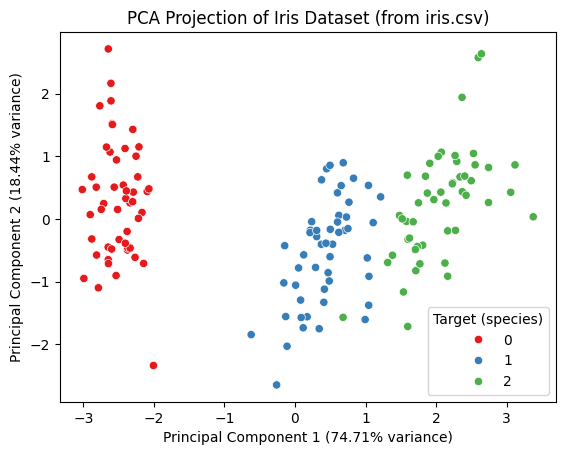

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA

# 1️⃣ Load the Iris dataset from CSV
df = pd.read_csv("iris.csv")  # Ensure iris.csv is in the same folder

print("🔹 First 10 rows of the Iris dataset:")
print(df.head(10))

# 2️⃣ Encode the 'species' column (convert text labels to numeric values)
label_encoder = LabelEncoder()
df['species_encoded'] = label_encoder.fit_transform(df['species'])

# 3️⃣ Separate features and target
X = df.drop(['species', 'species_encoded'], axis=1).values
y = df['species_encoded'].values
feature_names = df.drop(['species', 'species_encoded'], axis=1).columns
target_names = label_encoder.classes_



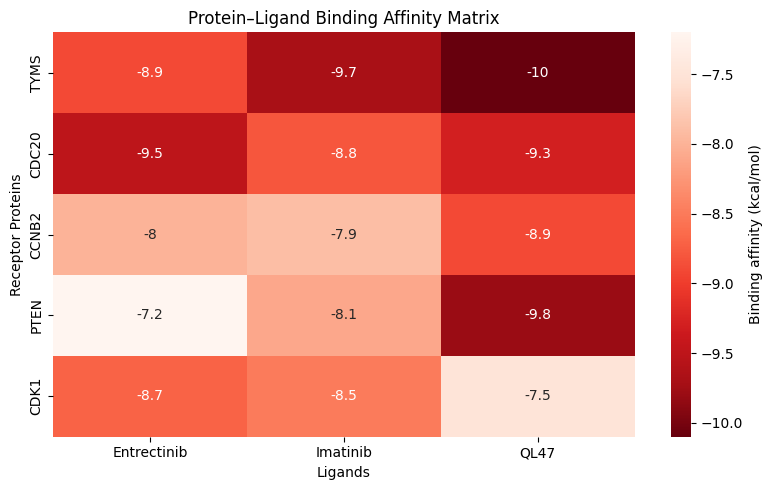

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example data — replace with your real docking scores
data = {
    'Entrectinib': [-8.9, -9.5, -8.0, -7.2, -8.7],
    'Imatinib':    [-9.7, -8.8, -7.9, -8.1, -8.5],
    'QL47':        [-10.1, -9.3, -8.9, -9.8, -7.5],
}

# Index = protein names (receptors)
proteins = ['TYMS', 'CDC20', 'CCNB2', 'PTEN', 'CDK1']

# Create DataFrame
df = pd.DataFrame(data, index=proteins)

# Plot heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(
    df,
    annot=True,         # show values in cells
    cmap='Reds_r',      # reverse Reds so stronger binding (more negative) is darker red
    cbar_kws={'label': 'Binding affinity (kcal/mol)'}
)

plt.title('Protein–Ligand Binding Affinity Matrix')
plt.xlabel('Ligands')
plt.ylabel('Receptor Proteins')
plt.tight_layout()
plt.show()



🔹 Explained variance ratio (2 components): [0.7470533  0.18435257]


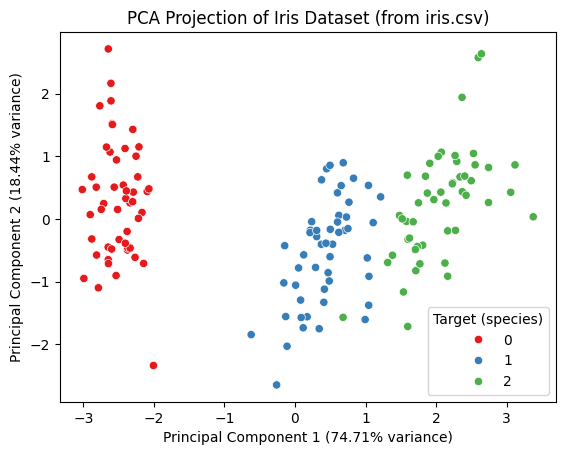

In [6]:
# 4️⃣ Standardize the features (important before PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5️⃣ Apply PCA (reduce to 2 components)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("\n🔹 Explained variance ratio (2 components):", pca.explained_variance_ratio_)

# 6️⃣ Create a new DataFrame with PCA results
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['target'] = y

# 7️⃣ Visualize PCA-transformed data
sns.scatterplot(
    x='PC1', y='PC2', 
    hue='target', 
    palette='Set1', 
    data=df_pca
)
plt.title("PCA Projection of Iris Dataset (from iris.csv)")
plt.xlabel(f"Principal Component 1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance)")
plt.ylabel(f"Principal Component 2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance)")
plt.legend(title="Target (species)")
plt.show()
